# Séries Temporais e Forecast - Facebook Prophet

Neste notebook, usaremos o pacote Facebook Prophet para prever o valor das ações do Facebook usando dados entre o intervalo de 29/02/2016 e 25/02/2022.  
Fonte dos dados: https://finance.yahoo.com/quote/FB/history/

In [22]:
import numpy as np
import pandas as pd
from sklearn import metrics
from prophet import Prophet
import plotly.express as px

In [12]:
df = pd.read_csv('FB.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-02-29,107.599998,108.910004,106.750000,106.919998,106.919998,32779000
1,2016-03-01,107.830002,109.820000,107.599998,109.820000,109.820000,26817300
2,2016-03-02,109.680000,110.550003,108.769997,109.949997,109.949997,25670200
3,2016-03-03,110.250000,110.300003,108.540001,109.580002,109.580002,21353100
4,2016-03-04,110.050003,110.050003,107.930000,108.389999,108.389999,24938900


In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns = {'Date': 'ds', 'Close': 'y'})
df.head()

,ds,Open,High,Low,y,Adj Close,Volume
0,2016-02-29,107.599998,108.910004,106.750000,106.919998,106.919998,32779000
1,2016-03-01,107.830002,109.820000,107.599998,109.820000,109.820000,26817300
2,2016-03-02,109.680000,110.550003,108.769997,109.949997,109.949997,25670200
3,2016-03-03,110.250000,110.300003,108.540001,109.580002,109.580002,21353100
4,2016-03-04,110.050003,110.050003,107.930000,108.389999,108.389999,24938900


In [14]:
#O conjunto de teste será os últimos 30 dias úteis (intervalo de 13/01/2022 e 25/02/2022)
test = df.tail(30)
df = df.drop(test.index)
train = df

In [15]:
#Criando o modelo e acrescentando variáveis exógenas
model = Prophet(yearly_seasonality = False)
model.add_regressor('Open')
model.add_regressor('High')
model.add_regressor('Low')
model.add_regressor('Adj Close')
model.add_regressor('Volume')
model.fit(train)
p = 30 #Período de 30 dias para predição
future = model.make_future_dataframe(periods = p, freq = 'D', include_history = False)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
future['Open'] = test['Open'].values
future['High'] = test['High'].values
future['Low'] = test['Low'].values
future['Adj Close'] = test['Adj Close'].values
future['Volume'] = test['Volume'].values
forecast = model.predict(future)

In [17]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred/y_true))) * 100
    print(f'MSE: {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE: {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE: {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2: {metrics.r2_score(y_true, y_pred)}')

In [18]:
timeseries_evaluation_metrics_func(test['y'], forecast['yhat'])

MSE: 791.2344591226877
MAE: 14.534936397362587
RMSE: 28.12889011537227
MAPE: 26099.797329723846
R2: 0.6624943679984217


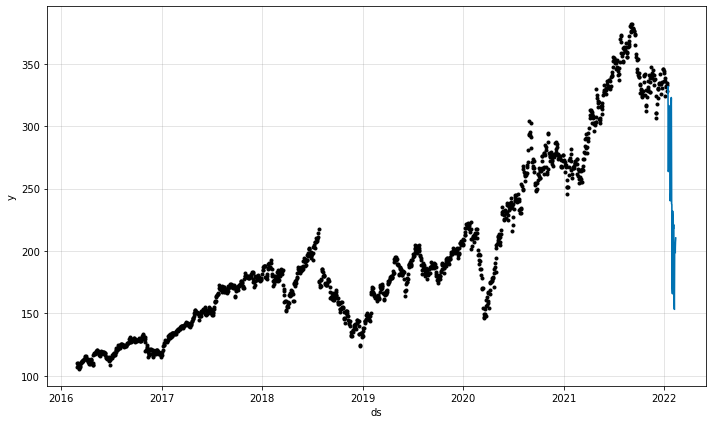

In [20]:
#Plotando o gráfico da predição
fig1 = model.plot(forecast)

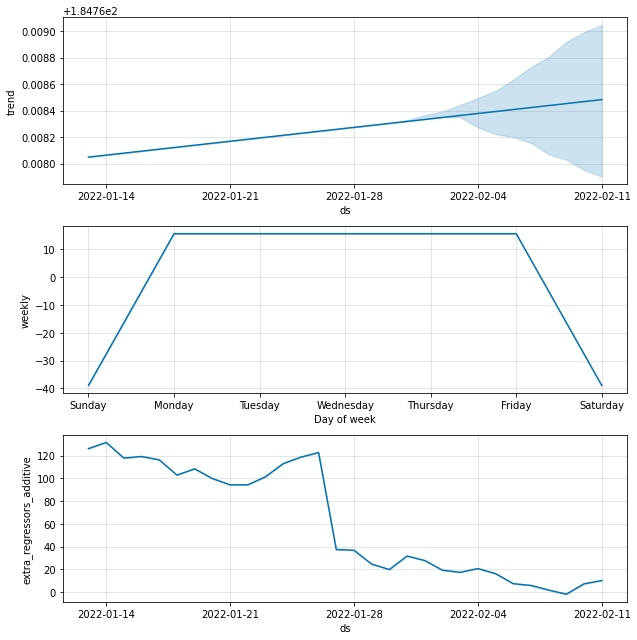

In [21]:
fig2 = model.plot_components(forecast)